# DSC680 Project 1
# Stock Market Analysis with technical indicators and preditions- Part one

In [1]:
# Import the required packages
import json
from pathlib import Path
import numpy as np
import pandas as pd
import os
import random
import copy
import matplotlib.pyplot as plt

In [2]:
# Import the required packages
import os
import sys
import seaborn as sns
import plotly
import plotly.express as px

In [3]:
# Input Data files 
data_dir = Path('C:/Users/anjal/Downloads/DSC680-main (1)/DSC680-main/Project1-stock-market-technical-indicators_and_Prediction/Data/')


## Read the stocks data

In [4]:
os.chdir(data_dir.joinpath('Stocks'))
list = os.listdir()
number_files = len(list)
print('Number of stocks:' + str(number_files))

Number of stocks:7195


# Exploratory data analysis

### Choose any 4 random stock data for analysis

In [5]:
os.chdir(data_dir.joinpath('Stocks'))
filenames = random.sample([x for x in os.listdir() if x.endswith('.txt') 
                           and os.path.getsize(os.path.join('',x)) > 0], 4)
print(filenames)

['aqn.us.txt', 'hacv.us.txt', 'bbox.us.txt', 'vza.us.txt']


### Read data into dataframes and create lable column from filename

In [6]:
data = []
for filename in filenames:
    df = pd.read_csv(os.path.join('',filename), sep=',')
    label, _, _ = filename.split(sep='.')
    df['Label'] = label
    #df['Date'] = pd.to_datetime(df['Date'])
    print('filename:' + os.path.join('',filename) + ' Label:' + label)

    data.append(df)

filename:aqn.us.txt Label:aqn
filename:hacv.us.txt Label:hacv
filename:bbox.us.txt Label:bbox
filename:vza.us.txt Label:vza


### Print sample data 

In [7]:
data[0].head()

,Date,Open,High,Low,Close,Volume,OpenInt,Label
0,2016-11-30,7.8789,7.9267,7.8026,7.9172,164958,0,aqn
1,2016-12-01,8.1178,8.1845,7.9172,8.0987,57769,0,aqn
2,2016-12-02,8.0030,8.0700,7.9267,7.9267,61667,0,aqn
3,2016-12-05,7.9936,7.9936,7.9238,7.9363,71752,0,aqn
4,2016-12-06,7.9459,7.9650,7.8312,7.8885,59055,0,aqn


In [8]:
data[1].head()

,Date,Open,High,Low,Close,Volume,OpenInt,Label
0,2016-01-08,23.054,23.067,23.049,23.067,3004,0,hacv
1,2016-01-14,22.942,22.942,22.942,22.942,310,0,hacv
2,2016-01-15,22.537,22.547,22.537,22.542,517,0,hacv
3,2016-01-19,22.731,22.731,22.731,22.731,103,0,hacv
4,2016-01-29,23.476,23.476,23.476,23.476,103,0,hacv


In [9]:
print(len(data))

4


## Add Technical Indicators in the dataframe

There are many types of Technical Indicators. 
The Technical Indicators we are considering are:
- RSI
- Volume (plain)
- Bollinger Bands
- Aroon Oscillator
- Price Volume Trend
- acceleration bands

In [10]:
TechIndicator = copy.deepcopy(data)

## Calculation of Relative Strength Index (RSI)

### Relative Strength Index
### PriceUp = Price > 0
### PriceDown = Price < 0
### Avg(PriceUp)/(Avg(PriceUP)+Avg(PriceDown)*100
### Where: PriceUp(t)=1*(Price(t)-Price(t-1)){Price(t)- Price(t-1)>0};
### PriceDown(t)=-1*(Price(t)-Price(t-1)){Price(t)- Price(t-1)<0};


In [11]:

def rsi(values):
    up = values[values>0].mean()
    down = -1*values[values<0].mean()
    return 100 * up / (up + down)


In [12]:
# Add Momentum_1D column for all stocks.
# Momentum_1D = P(t) - P(t-1)
for stock in range(len(TechIndicator)):
    TechIndicator[stock]['Momentum_1D'] = (TechIndicator[stock]['Close']-TechIndicator[stock]['Close'].shift(1)).fillna(0)
    TechIndicator[stock]['RSI_14D'] = TechIndicator[stock]['Momentum_1D'].rolling(center=False, window=14).apply(rsi).fillna(0)
TechIndicator[1].tail(5)

,Date,Open,High,Low,Close,Volume,OpenInt,Label,Momentum_1D,RSI_14D
422,2017-11-06,29.0700,29.0700,29.0700,29.0700,132,0,hacv,0.0346,79.945055
423,2017-11-07,29.1100,29.1100,29.1100,29.1100,350,0,hacv,0.0400,78.608059
424,2017-11-08,29.1100,29.1100,29.1100,29.1100,0,0,hacv,0.0000,78.982726
425,2017-11-09,29.0799,29.0799,29.0799,29.0799,350,0,hacv,-0.0301,71.055472
426,2017-11-10,29.1700,29.1700,29.0800,29.0800,233,0,hacv,0.0001,64.817001


In [13]:
TechIndicator[1].head(5)

,Date,Open,High,Low,Close,Volume,OpenInt,Label,Momentum_1D,RSI_14D
0,2016-01-08,23.054,23.067,23.049,23.067,3004,0,hacv,0.000,0.0
1,2016-01-14,22.942,22.942,22.942,22.942,310,0,hacv,-0.125,0.0
2,2016-01-15,22.537,22.547,22.537,22.542,517,0,hacv,-0.400,0.0
3,2016-01-19,22.731,22.731,22.731,22.731,103,0,hacv,0.189,0.0
4,2016-01-29,23.476,23.476,23.476,23.476,103,0,hacv,0.745,0.0


### Calculation of Volume (Plain)

In [14]:
for stock in range(len(TechIndicator)):
    TechIndicator[stock]['Volume_plain'] = TechIndicator[stock]['Volume'].fillna(0)
TechIndicator[0].tail()

,Date,Open,High,Low,Close,Volume,OpenInt,Label,Momentum_1D,RSI_14D,Volume_plain
235,2017-11-06,10.55,10.660,10.54,10.65,123961,0,aqn,0.10,41.525424,123961
236,2017-11-07,10.57,10.616,10.52,10.54,136059,0,aqn,-0.11,40.046566,136059
237,2017-11-08,10.57,10.570,10.45,10.51,162865,0,aqn,-0.03,45.290323,162865
238,2017-11-09,10.47,10.580,10.44,10.52,168758,0,aqn,0.01,41.830065,168758
239,2017-11-10,10.51,10.530,10.46,10.49,120730,0,aqn,-0.03,43.902439,120730


### Calculation of Bollinger Bands

In [15]:
def bbands(price, length=30, numsd=2):
    """ returns average, upper band, and lower band"""
    #ave = pd.stats.moments.rolling_mean(price,length)
    ave = price.rolling(window = length, center = False).mean()
    #sd = pd.stats.moments.rolling_std(price,length)
    sd = price.rolling(window = length, center = False).std()
    upband = ave + (sd*numsd)
    dnband = ave - (sd*numsd)
    return np.round(ave,3), np.round(upband,3), np.round(dnband,3)

In [16]:
for stock in range(len(TechIndicator)):
    TechIndicator[stock]['BB_Middle_Band'], TechIndicator[stock]['BB_Upper_Band'], TechIndicator[stock]['BB_Lower_Band'] = bbands(TechIndicator[stock]['Close'], length=20, numsd=1)
    TechIndicator[stock]['BB_Middle_Band'] = TechIndicator[stock]['BB_Middle_Band'].fillna(0)
    TechIndicator[stock]['BB_Upper_Band'] = TechIndicator[stock]['BB_Upper_Band'].fillna(0)
    TechIndicator[stock]['BB_Lower_Band'] = TechIndicator[stock]['BB_Lower_Band'].fillna(0)
TechIndicator[0].tail()

,Date,Open,High,Low,Close,Volume,OpenInt,Label,Momentum_1D,RSI_14D,Volume_plain,BB_Middle_Band,BB_Upper_Band,BB_Lower_Band
235,2017-11-06,10.55,10.660,10.54,10.65,123961,0,aqn,0.10,41.525424,123961,10.816,11.015,10.617
236,2017-11-07,10.57,10.616,10.52,10.54,136059,0,aqn,-0.11,40.046566,136059,10.804,11.013,10.596
237,2017-11-08,10.57,10.570,10.45,10.51,162865,0,aqn,-0.03,45.290323,162865,10.784,11.001,10.568
238,2017-11-09,10.47,10.580,10.44,10.52,168758,0,aqn,0.01,41.830065,168758,10.768,10.991,10.544
239,2017-11-10,10.51,10.530,10.46,10.49,120730,0,aqn,-0.03,43.902439,120730,10.750,10.982,10.519


### Calculation of Aroon Oscillator

In [17]:
def Aroon_Oscillator(df, tf=25):
    aroonup = []
    aroondown = []
    x = tf
    while x< len(df['Date']):
        aroon_up = ((df['High'][x-tf:x].tolist().index(max(df['High'][x-tf:x])))/float(tf))*100
        aroon_down = ((df['Low'][x-tf:x].tolist().index(min(df['Low'][x-tf:x])))/float(tf))*100
        aroonup.append(aroon_up)
        aroondown.append(aroon_down)
        x+=1
    return aroonup, aroondown

In [18]:
for stock in range(len(TechIndicator)):
    listofzeros = [0] * 25
    up, down = Aroon_Oscillator(TechIndicator[stock])
    aroon_list = [x - y for x, y in zip(up,down)]
    if len(aroon_list)==0:
        aroon_list = [0] * TechIndicator[stock].shape[0]
        TechIndicator[stock]['Aroon_Oscillator'] = aroon_list
    else:
        TechIndicator[stock]['Aroon_Oscillator'] = listofzeros+aroon_list


In [19]:
TechIndicator[0].head()

,Date,Open,High,Low,Close,Volume,OpenInt,Label,Momentum_1D,RSI_14D,Volume_plain,BB_Middle_Band,BB_Upper_Band,BB_Lower_Band,Aroon_Oscillator
0,2016-11-30,7.8789,7.9267,7.8026,7.9172,164958,0,aqn,0.0000,0.0,164958,0.0,0.0,0.0,0.0
1,2016-12-01,8.1178,8.1845,7.9172,8.0987,57769,0,aqn,0.1815,0.0,57769,0.0,0.0,0.0,0.0
2,2016-12-02,8.0030,8.0700,7.9267,7.9267,61667,0,aqn,-0.1720,0.0,61667,0.0,0.0,0.0,0.0
3,2016-12-05,7.9936,7.9936,7.9238,7.9363,71752,0,aqn,0.0096,0.0,71752,0.0,0.0,0.0,0.0
4,2016-12-06,7.9459,7.9650,7.8312,7.8885,59055,0,aqn,-0.0478,0.0,59055,0.0,0.0,0.0,0.0


In [20]:
TechIndicator[0].tail()

,Date,Open,High,Low,Close,Volume,OpenInt,Label,Momentum_1D,RSI_14D,Volume_plain,BB_Middle_Band,BB_Upper_Band,BB_Lower_Band,Aroon_Oscillator
235,2017-11-06,10.55,10.660,10.54,10.65,123961,0,aqn,0.10,41.525424,123961,10.816,11.015,10.617,-40.0
236,2017-11-07,10.57,10.616,10.52,10.54,136059,0,aqn,-0.11,40.046566,136059,10.804,11.013,10.596,-40.0
237,2017-11-08,10.57,10.570,10.45,10.51,162865,0,aqn,-0.03,45.290323,162865,10.784,11.001,10.568,-40.0
238,2017-11-09,10.47,10.580,10.44,10.52,168758,0,aqn,0.01,41.830065,168758,10.768,10.991,10.544,-40.0
239,2017-11-10,10.51,10.530,10.46,10.49,120730,0,aqn,-0.03,43.902439,120730,10.750,10.982,10.519,-40.0


### Calculation of Price Volume Trend

PVT = [((CurrentClose - PreviousClose) / PreviousClose) x Volume] + PreviousPVT

In [21]:
for stock in range(len(TechIndicator)):
    TechIndicator[stock]["PVT"] = (TechIndicator[stock]['Momentum_1D']/ TechIndicator[stock]['Close'].shift(1))*TechIndicator[stock]['Volume']
    TechIndicator[stock]["PVT"] = TechIndicator[stock]["PVT"]+TechIndicator[stock]["PVT"].shift(1)
    TechIndicator[stock]["PVT"] = TechIndicator[stock]["PVT"].fillna(0)
TechIndicator[0].tail()

,Date,Open,High,Low,Close,Volume,OpenInt,Label,Momentum_1D,RSI_14D,Volume_plain,BB_Middle_Band,BB_Upper_Band,BB_Lower_Band,Aroon_Oscillator,PVT
235,2017-11-06,10.55,10.660,10.54,10.65,123961,0,aqn,0.10,41.525424,123961,10.816,11.015,10.617,-40.0,24666.560661
236,2017-11-07,10.57,10.616,10.52,10.54,136059,0,aqn,-0.11,40.046566,136059,10.804,11.013,10.596,-40.0,-230.318443
237,2017-11-08,10.57,10.570,10.45,10.51,162865,0,aqn,-0.03,45.290323,162865,10.784,11.001,10.568,-40.0,-1868.866844
238,2017-11-09,10.47,10.580,10.44,10.52,168758,0,aqn,0.01,41.830065,168758,10.768,10.991,10.544,-40.0,-302.993637
239,2017-11-10,10.51,10.530,10.46,10.49,120730,0,aqn,-0.03,43.902439,120730,10.750,10.982,10.519,-40.0,-183.718090


### Calculation of Acceleration Bands

lower envelope bands around a simple moving average. 

In [22]:
def abands(df):
    #df['AB_Middle_Band'] = pd.rolling_mean(df['Close'], 20)
    df['AB_Middle_Band'] = df['Close'].rolling(window = 20, center=False).mean()
    # High * ( 1 + 4 * (High - Low) / (High + Low))
    df['aupband'] = df['High'] * (1 + 4 * (df['High']-df['Low'])/(df['High']+df['Low']))
    df['AB_Upper_Band'] = df['aupband'].rolling(window=20, center=False).mean()
    # Low *(1 - 4 * (High - Low)/ (High + Low))
    df['adownband'] = df['Low'] * (1 - 4 * (df['High']-df['Low'])/(df['High']+df['Low']))
    df['AB_Lower_Band'] = df['adownband'].rolling(window=20, center=False).mean()

In [23]:
for stock in range(len(TechIndicator)):
    abands(TechIndicator[stock])
    TechIndicator[stock] = TechIndicator[stock].fillna(0)
TechIndicator[0].tail()

,Date,Open,High,Low,Close,Volume,OpenInt,Label,Momentum_1D,RSI_14D,...,BB_Middle_Band,BB_Upper_Band,BB_Lower_Band,Aroon_Oscillator,PVT,AB_Middle_Band,aupband,AB_Upper_Band,adownband,AB_Lower_Band
235,2017-11-06,10.55,10.660,10.54,10.65,123961,0,aqn,0.10,41.525424,...,10.816,11.015,10.617,-40.0,24666.560661,10.8160,10.901358,11.210310,10.301358,10.427060
236,2017-11-07,10.57,10.616,10.52,10.54,136059,0,aqn,-0.11,40.046566,...,10.804,11.013,10.596,-40.0,-230.318443,10.8045,10.808872,11.199208,10.328872,10.416958
237,2017-11-08,10.57,10.570,10.45,10.51,162865,0,aqn,-0.03,45.290323,...,10.784,11.001,10.568,-40.0,-1868.866844,10.7845,10.811370,11.177686,10.211370,10.400436
238,2017-11-09,10.47,10.580,10.44,10.52,168758,0,aqn,0.01,41.830065,...,10.768,10.991,10.544,-40.0,-302.993637,10.7675,10.861865,11.158676,10.161865,10.383926
239,2017-11-10,10.51,10.530,10.46,10.49,120730,0,aqn,-0.03,43.902439,...,10.750,10.982,10.519,-40.0,-183.718090,10.7505,10.670467,11.137662,10.320467,10.367912


## Cleanup the tables

In [24]:
columns2Drop = ['Momentum_1D', 'aupband', 'adownband']
for stock in range(len(TechIndicator)):
    TechIndicator[stock] = TechIndicator[stock].drop(labels = columns2Drop, axis=1)
TechIndicator[0].head()

,Date,Open,High,Low,Close,Volume,OpenInt,Label,RSI_14D,Volume_plain,BB_Middle_Band,BB_Upper_Band,BB_Lower_Band,Aroon_Oscillator,PVT,AB_Middle_Band,AB_Upper_Band,AB_Lower_Band
0,2016-11-30,7.8789,7.9267,7.8026,7.9172,164958,0,aqn,0.0,164958,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,2016-12-01,8.1178,8.1845,7.9172,8.0987,57769,0,aqn,0.0,57769,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,2016-12-02,8.0030,8.0700,7.9267,7.9267,61667,0,aqn,0.0,61667,0.0,0.0,0.0,0.0,14.658823,0.0,0.0,0.0
3,2016-12-05,7.9936,7.9936,7.9238,7.9363,71752,0,aqn,0.0,71752,0.0,0.0,0.0,0.0,-1222.783686,0.0,0.0,0.0
4,2016-12-06,7.9459,7.9650,7.8312,7.8885,59055,0,aqn,0.0,59055,0.0,0.0,0.0,0.0,-268.787164,0.0,0.0,0.0


# Visualization of technical indicators

In [25]:
for stock in range(len(TechIndicator)):
    TechIndicator[stock].index = TechIndicator[stock]['Date']
    TechIndicator[stock] = TechIndicator[stock].drop(labels = ['Date'], axis = 1)


In [26]:
TechIndicator[0].head()

,Open,High,Low,Close,Volume,OpenInt,Label,RSI_14D,Volume_plain,BB_Middle_Band,BB_Upper_Band,BB_Lower_Band,Aroon_Oscillator,PVT,AB_Middle_Band,AB_Upper_Band,AB_Lower_Band
Date,,,,,,,,,,,,,,,,,
2016-11-30,7.8789,7.9267,7.8026,7.9172,164958,0,aqn,0.0,164958,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2016-12-01,8.1178,8.1845,7.9172,8.0987,57769,0,aqn,0.0,57769,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2016-12-02,8.0030,8.0700,7.9267,7.9267,61667,0,aqn,0.0,61667,0.0,0.0,0.0,0.0,14.658823,0.0,0.0,0.0
2016-12-05,7.9936,7.9936,7.9238,7.9363,71752,0,aqn,0.0,71752,0.0,0.0,0.0,0.0,-1222.783686,0.0,0.0,0.0
2016-12-06,7.9459,7.9650,7.8312,7.8885,59055,0,aqn,0.0,59055,0.0,0.0,0.0,0.0,-268.787164,0.0,0.0,0.0


C:\Users\anjal\AppData\Local\Temp\ipykernel_20844\19547508.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.set_title(str(TechIndicator[i]['Label'][0]))


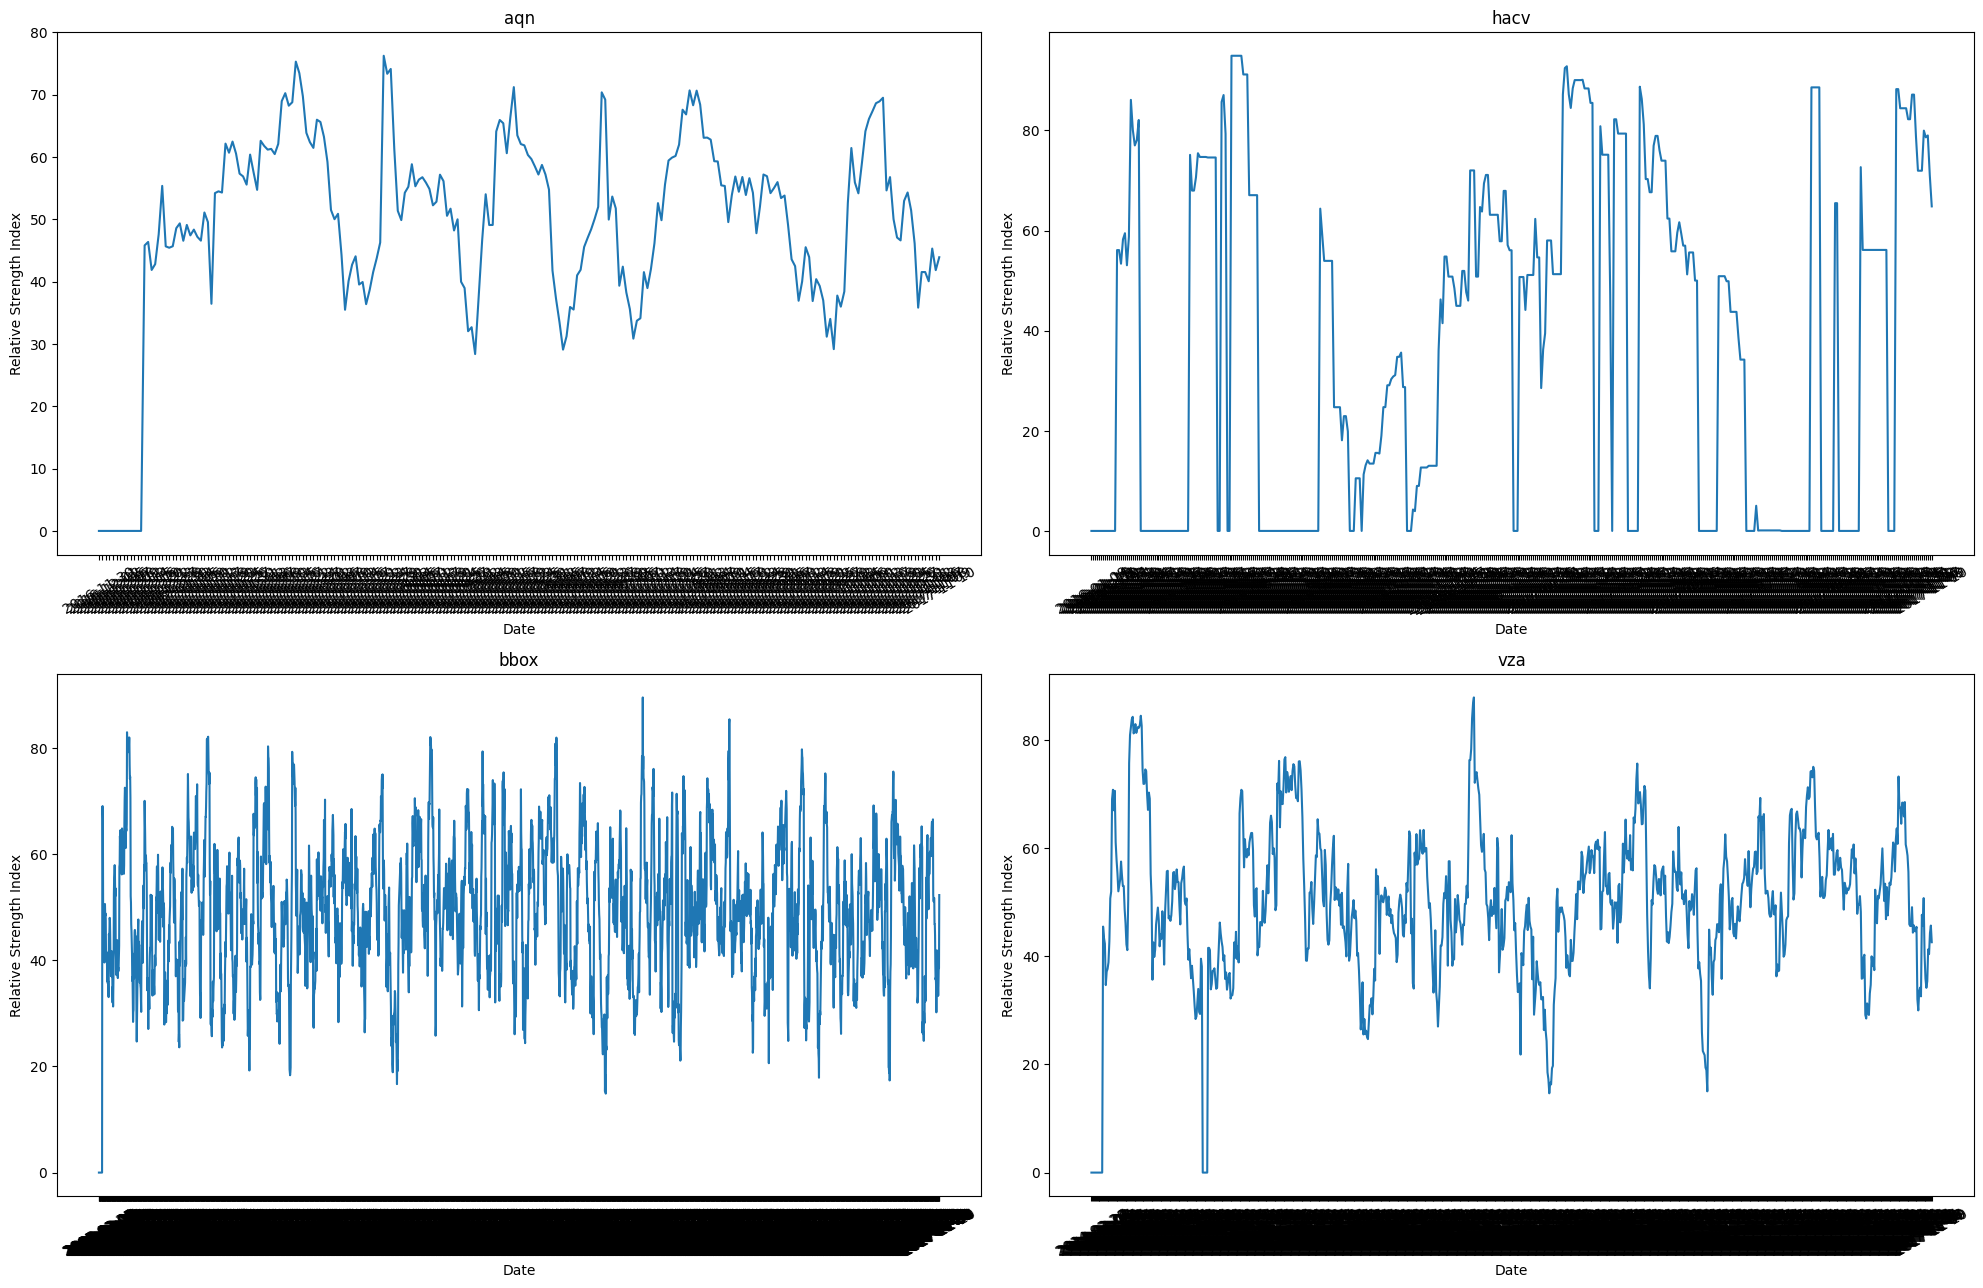

In [27]:
%matplotlib inline

# RSI Plot

fig = plt.figure(figsize=(20,25))
for i in range(4):
    ax = plt.subplot(4,2,i+1)
    ax.plot(TechIndicator[i].index, TechIndicator[i]['RSI_14D'])
    ax.set_title(str(TechIndicator[i]['Label'][0]))
    ax.set_xlabel("Date")
    ax.set_ylabel("Relative Strength Index")
    plt.xticks(rotation=30)
fig.tight_layout()

C:\Users\anjal\AppData\Local\Temp\ipykernel_20844\3109587125.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.set_title(str(TechIndicator[i]['Label'][0]))


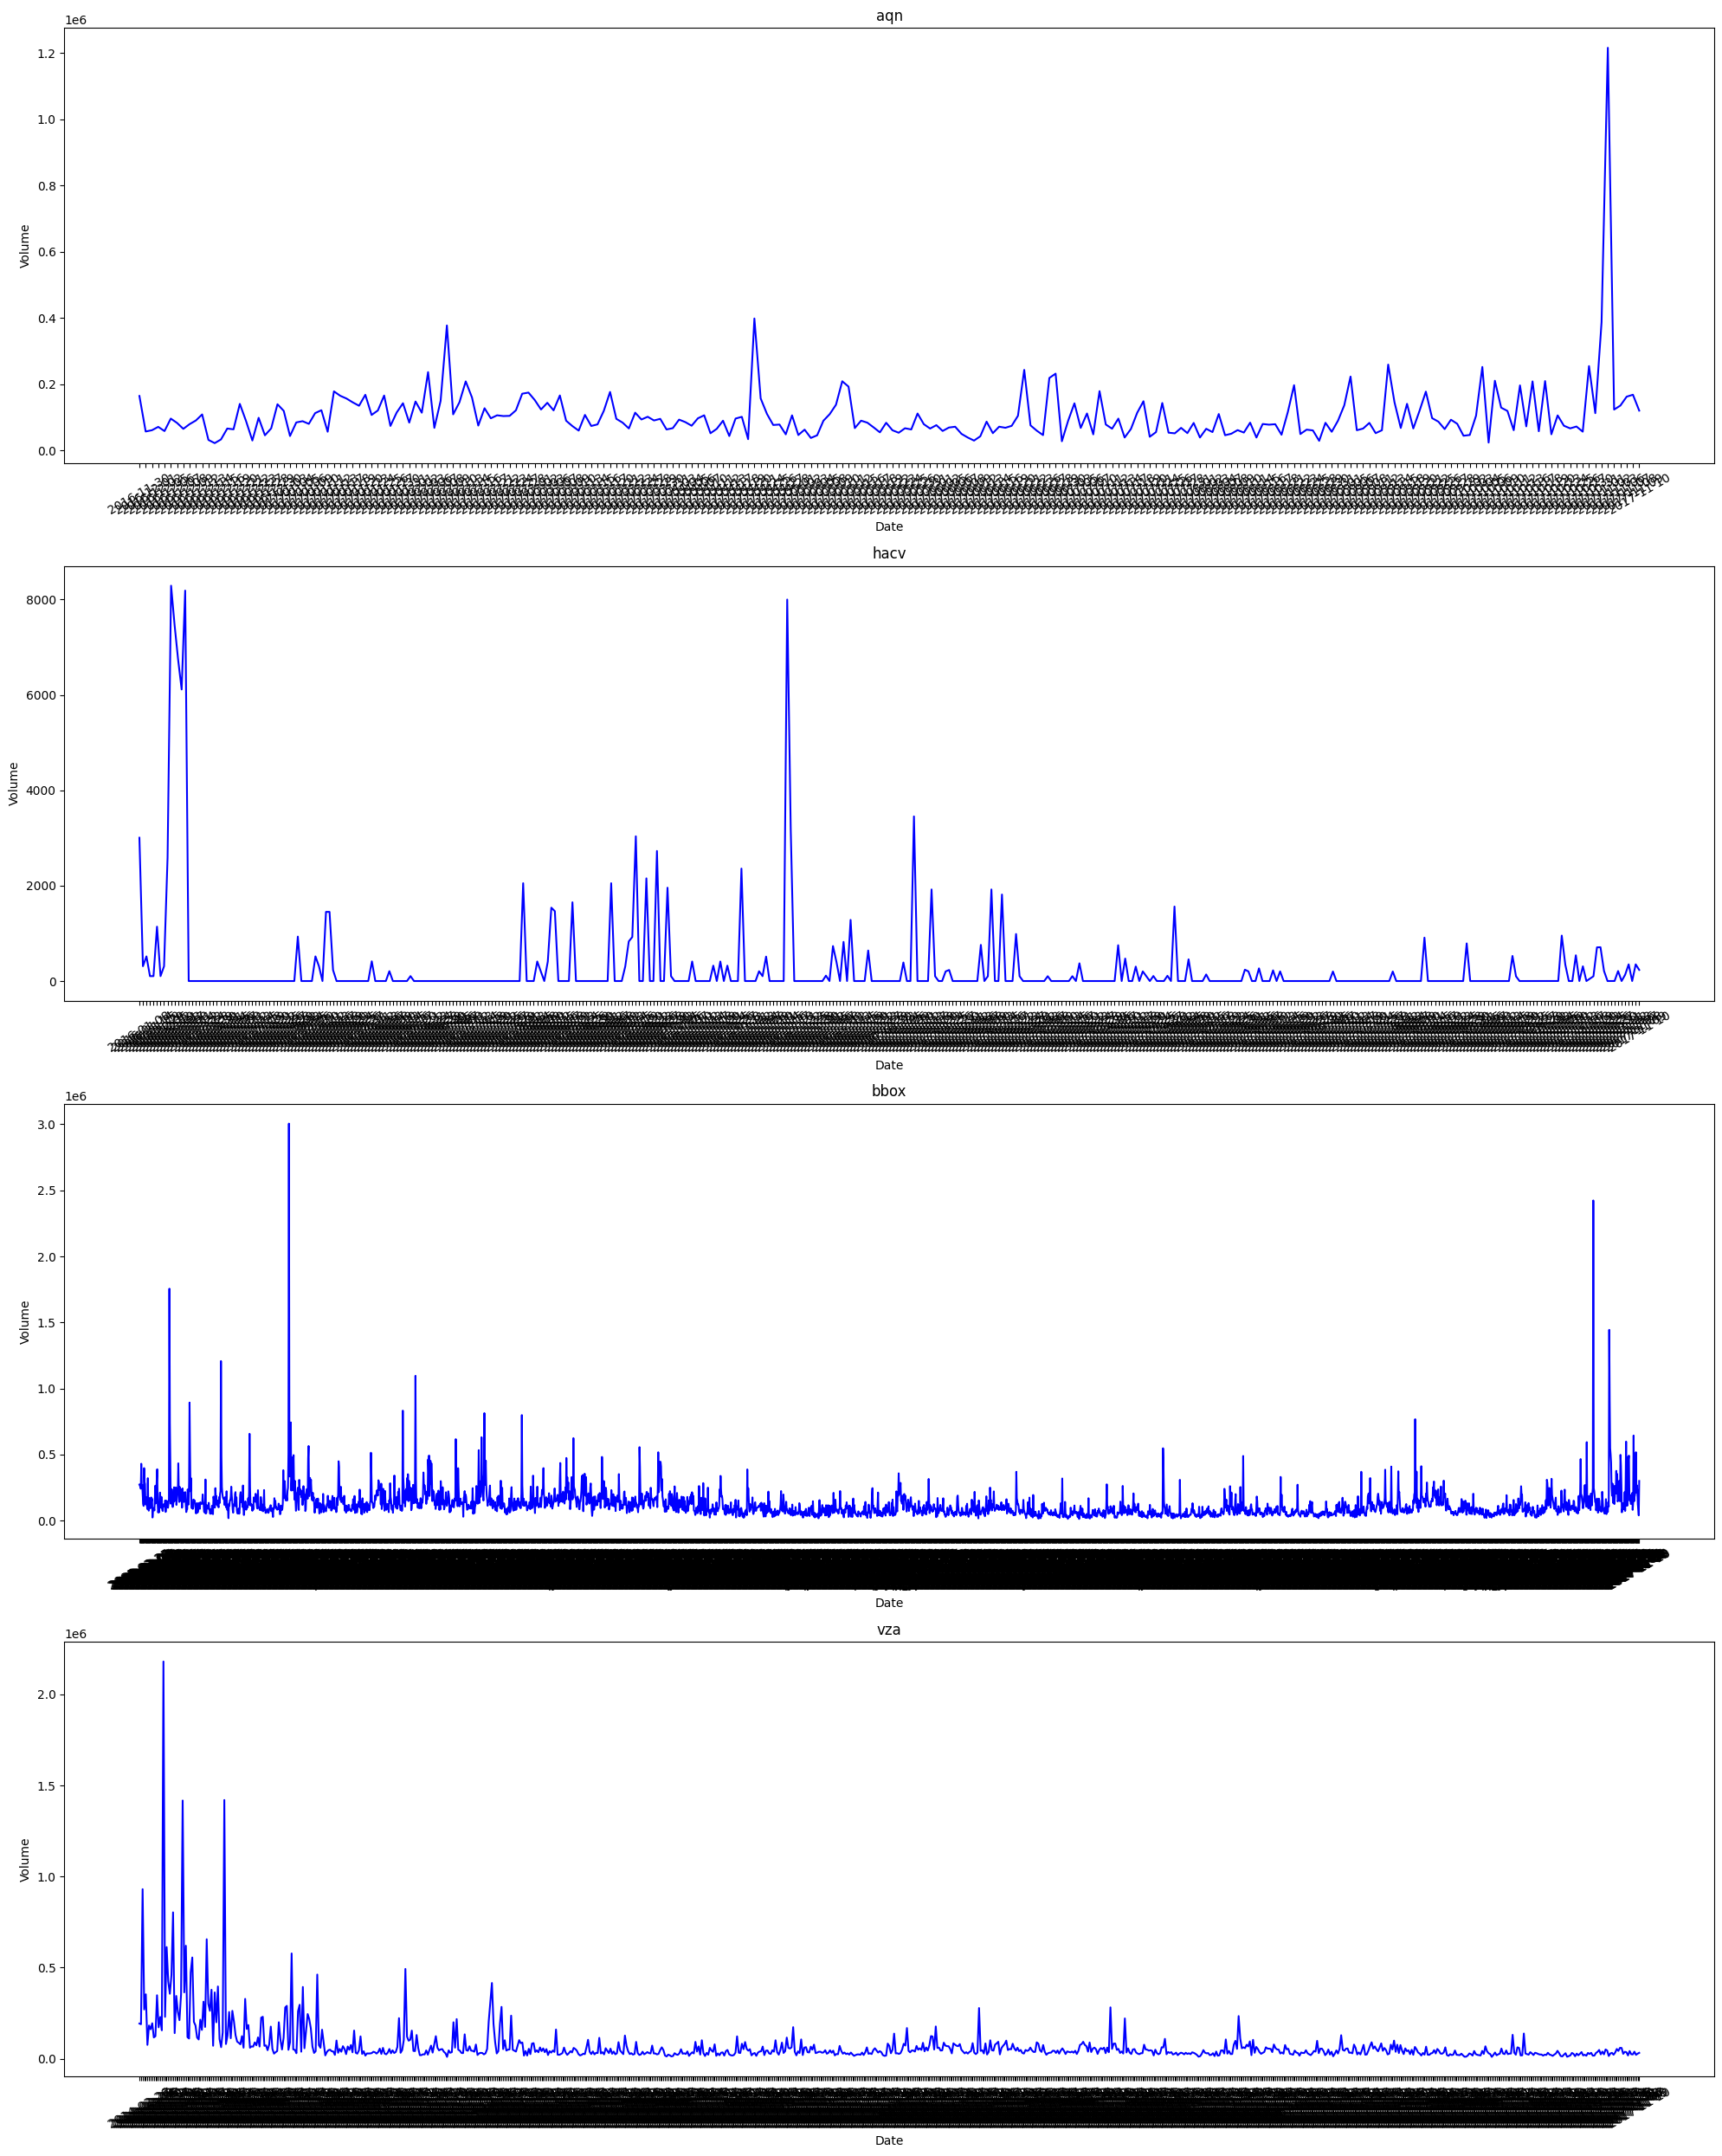

In [28]:
# Volume Plain plot
fig = plt.figure(figsize=(20,25))
for i in range(4):
    ax = plt.subplot(4,1,i+1)
    ax.plot(TechIndicator[i].index, TechIndicator[i]['Volume_plain'], 'b')
    ax.set_title(str(TechIndicator[i]['Label'][0]))
    ax.set_xlabel("Date")
    ax.set_ylabel("Volume")
    plt.xticks(rotation=30)
fig.tight_layout()

Bollinger Bands

C:\Users\anjal\AppData\Local\Temp\ipykernel_20844\2763385751.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.set_title("Bollinger Bands for " + str(TechIndicator[i]['Label'][0]))


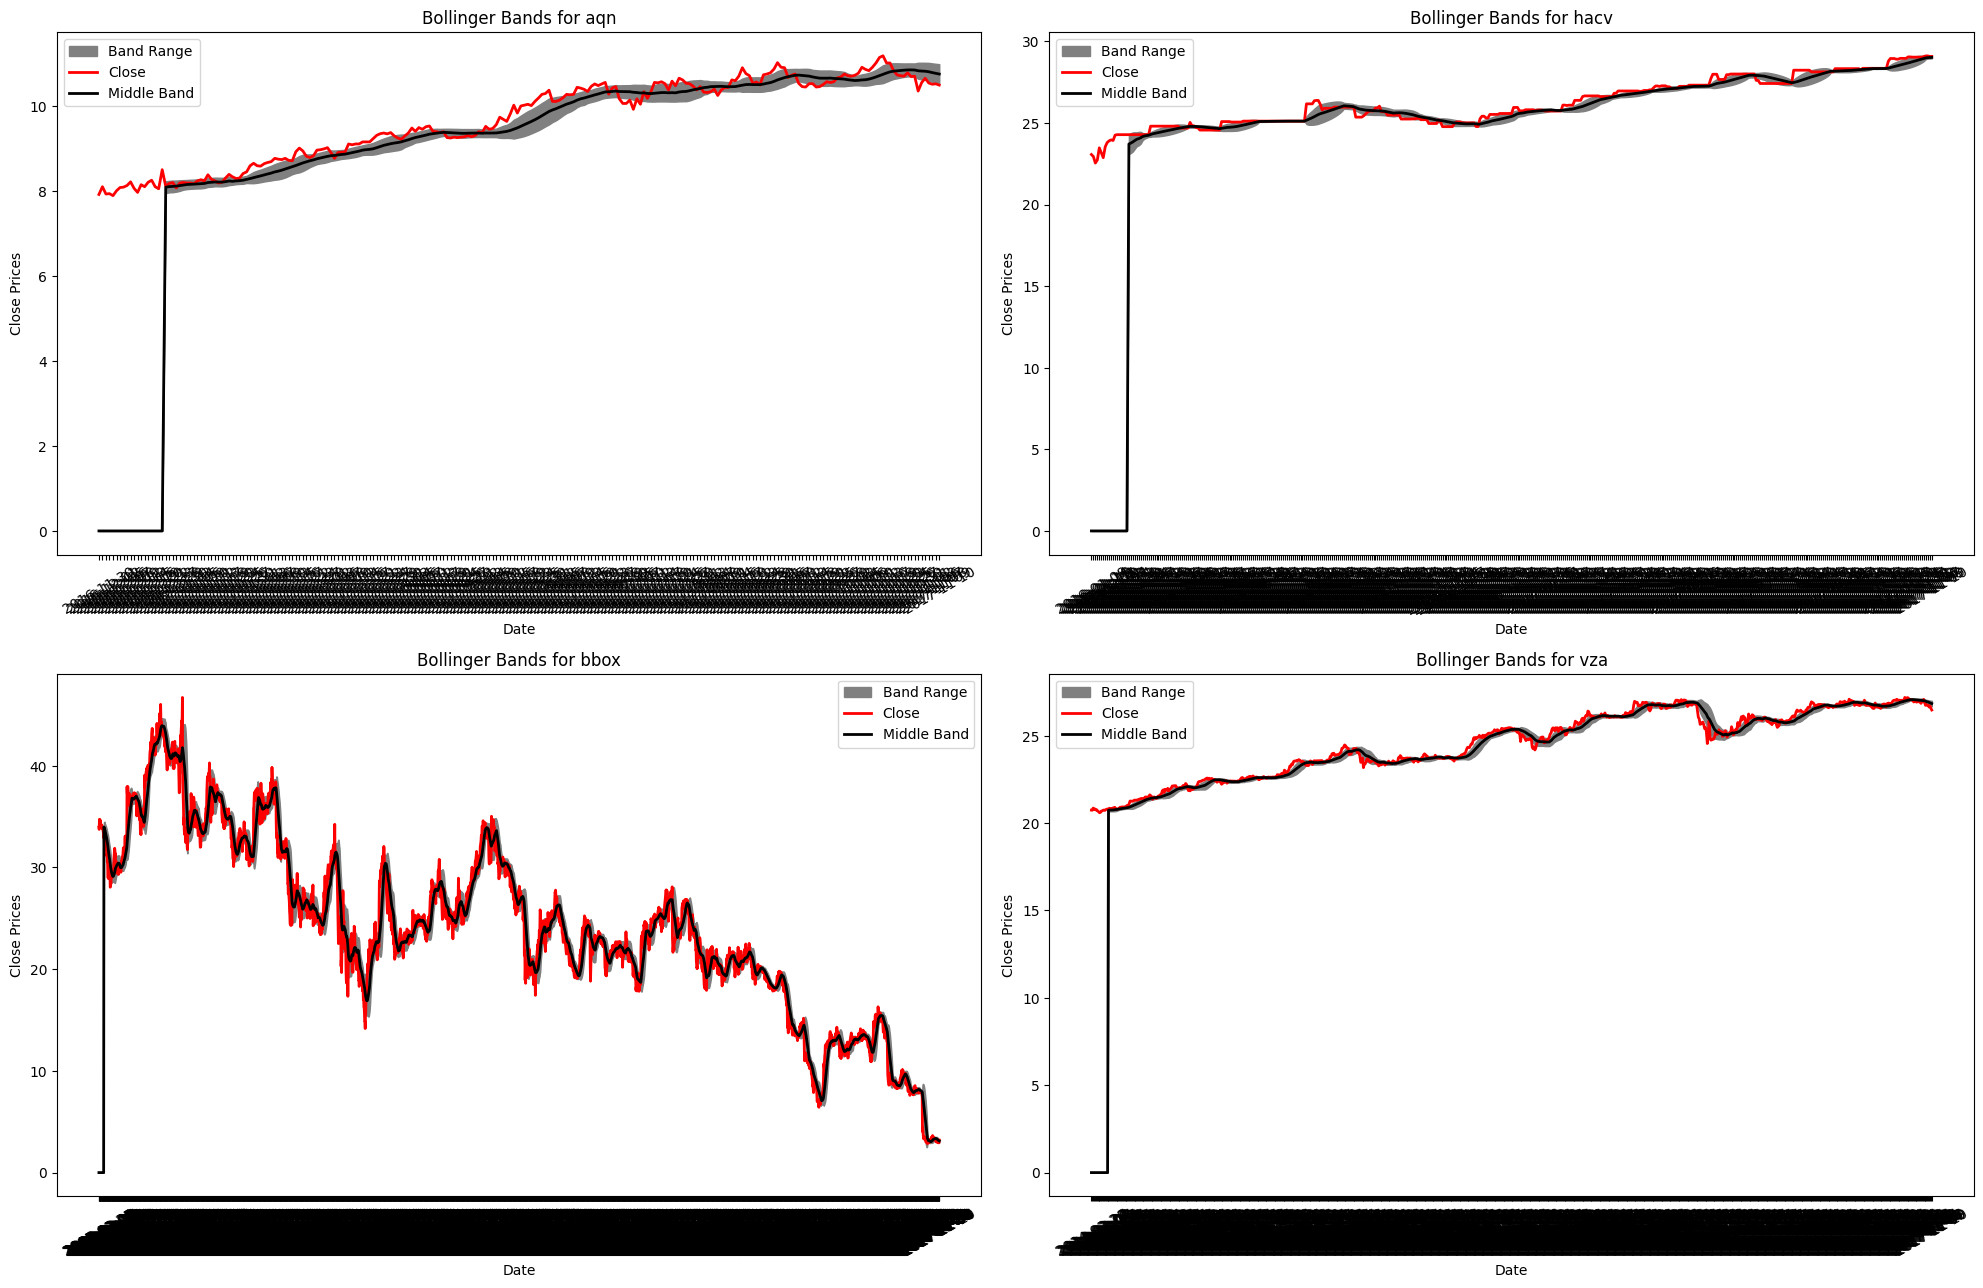

In [29]:
#plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(20,25))
for i in range(4):
    ax = plt.subplot(4,2,i+1)
    ax.fill_between(TechIndicator[i].index, TechIndicator[i]['BB_Upper_Band'], TechIndicator[i]['BB_Lower_Band'], color='grey', label="Band Range")
    # Plot Adjust Closing Price and Moving Averages
    ax.plot(TechIndicator[i].index, TechIndicator[i]['Close'], color='red', lw=2, label="Close")
    ax.plot(TechIndicator[i].index, TechIndicator[i]['BB_Middle_Band'], color='black', lw=2, label="Middle Band")
    ax.set_title("Bollinger Bands for " + str(TechIndicator[i]['Label'][0]))
    ax.legend()
    ax.set_xlabel("Date")
    ax.set_ylabel("Close Prices")
    plt.xticks(rotation=30)
fig.tight_layout()
#.dt.to_pydatetime()

C:\Users\anjal\AppData\Local\Temp\ipykernel_20844\846803245.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.set_title("Aroon Oscillator for " +str(TechIndicator[i]['Label'][0]))


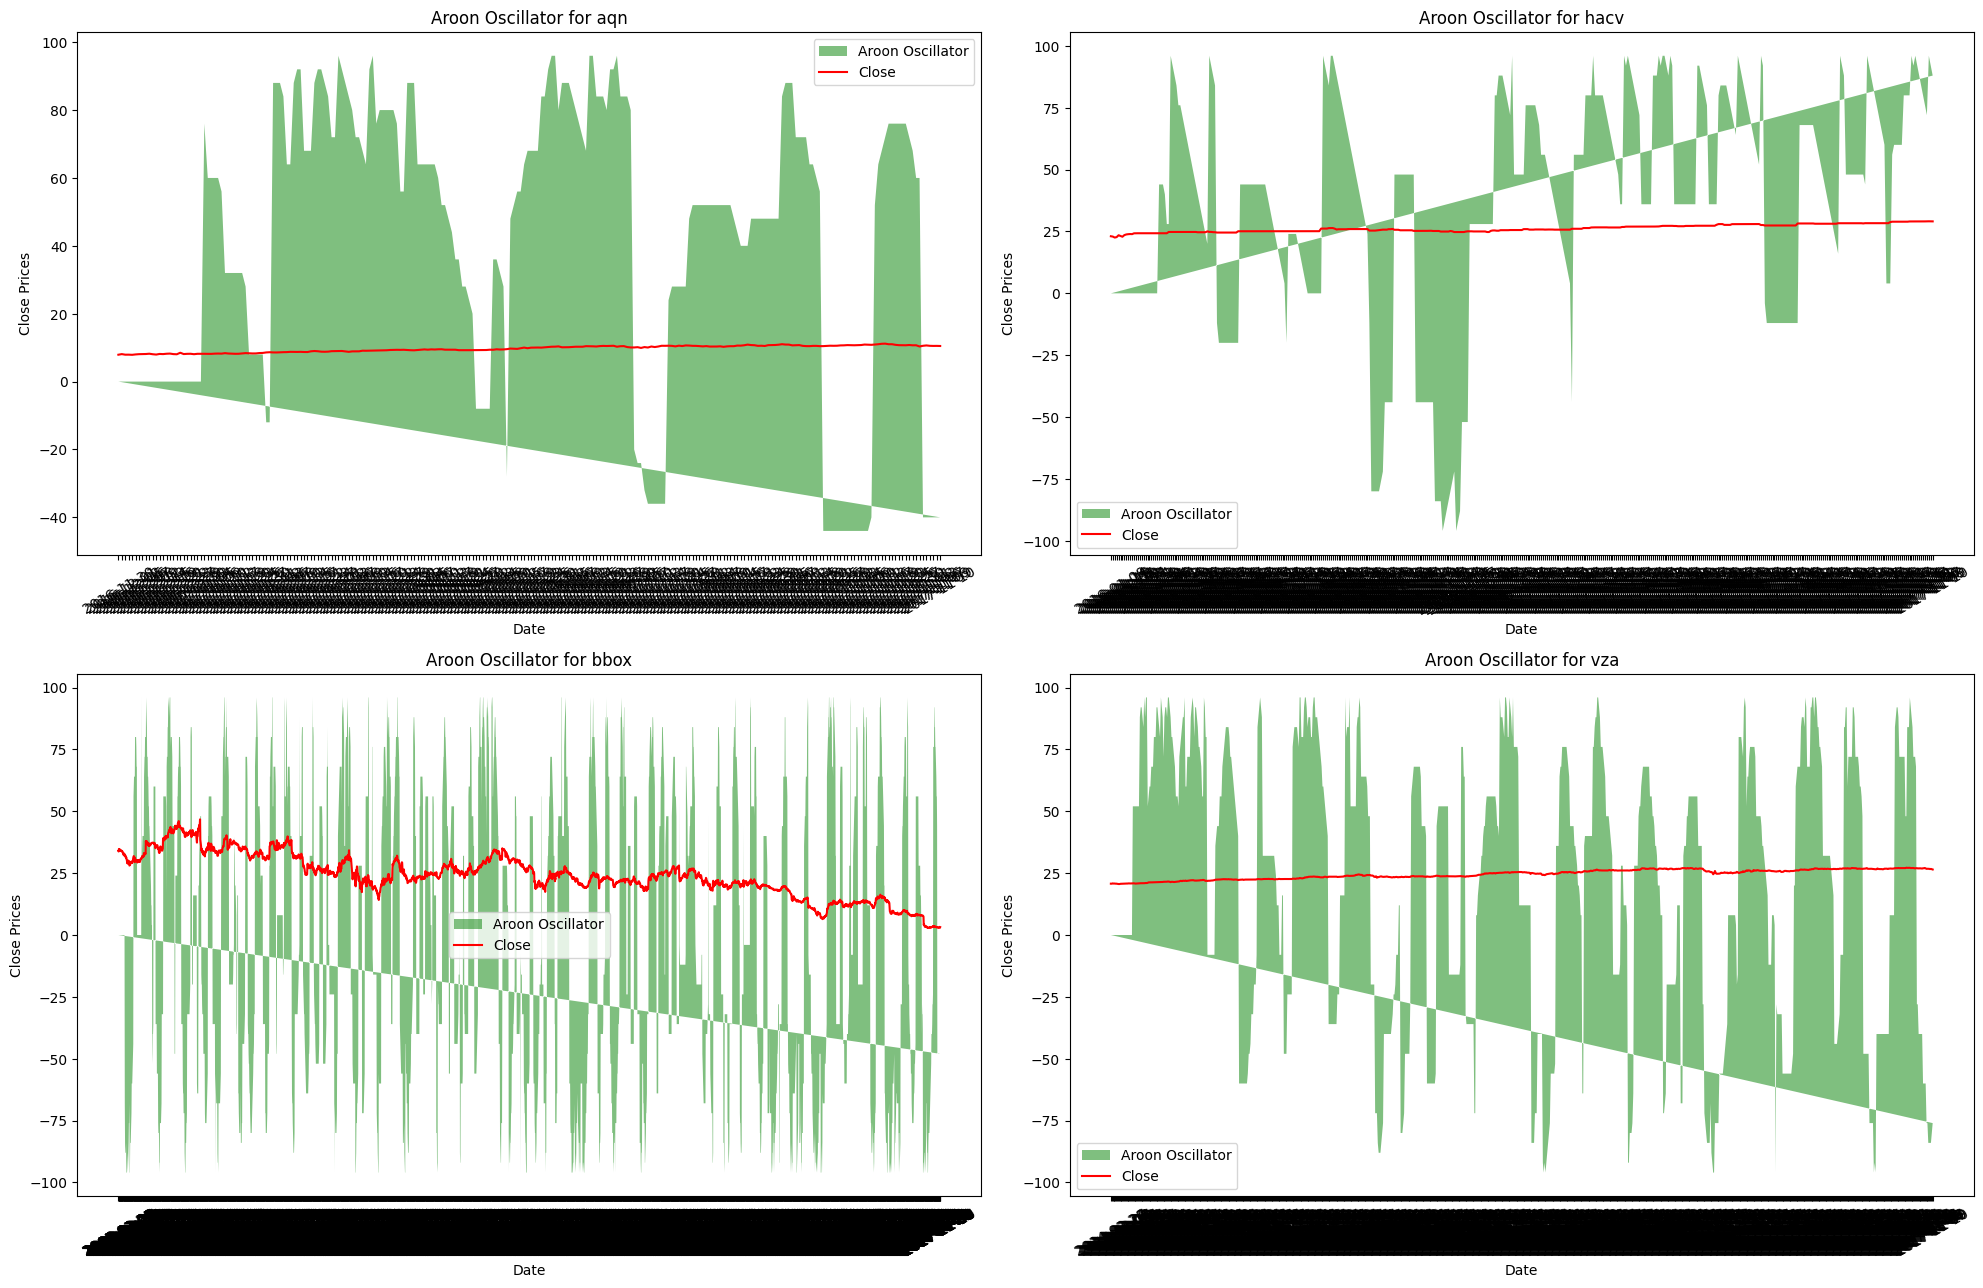

In [30]:
# Aroon Oscillator Plot
#plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,25))
for i in range(4):
    ax = plt.subplot(4,2,i+1)
    ax.fill(TechIndicator[i].index, TechIndicator[i]['Aroon_Oscillator'],'g', alpha = 0.5, label = "Aroon Oscillator")
    ax.plot(TechIndicator[i].index, TechIndicator[i]['Close'], 'r', label="Close")
    ax.set_title("Aroon Oscillator for " +str(TechIndicator[i]['Label'][0]))
    ax.legend()
    ax.set_xlabel("Date")
    ax.set_ylabel("Close Prices")
    plt.xticks(rotation=30)
fig.tight_layout()

C:\Users\anjal\AppData\Local\Temp\ipykernel_20844\1221810916.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.set_title("Price Volume Trend of " +str(TechIndicator[i]['Label'][0]))


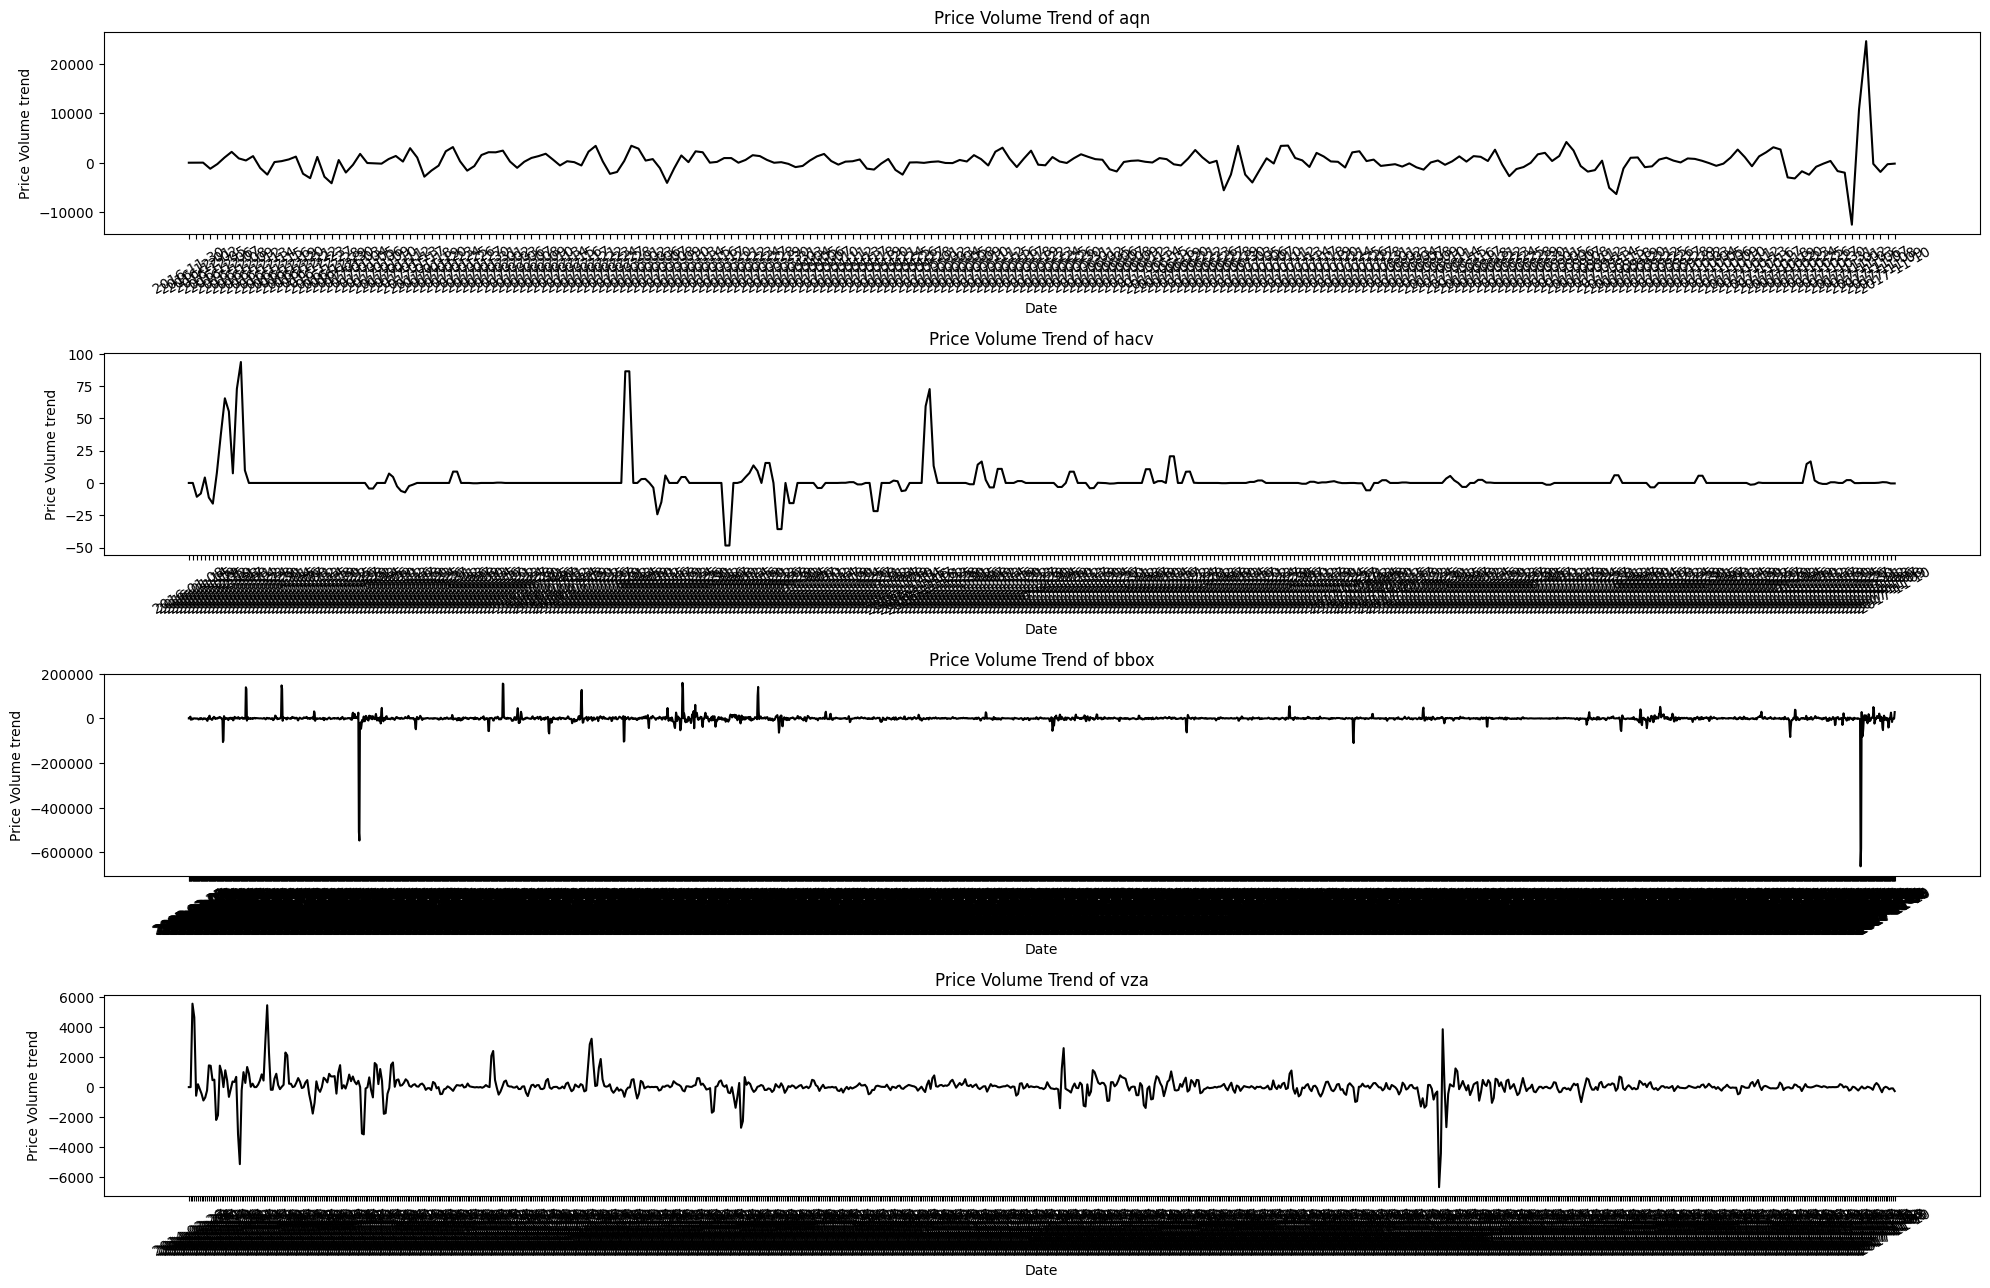

In [31]:
# PRice Volume Trend Plot
fig = plt.figure(figsize=(20,25))
for i in range(4):
    ax = plt.subplot(8,1,i+1)
    ax.plot(TechIndicator[i].index, TechIndicator[i]['PVT'], 'black')
    ax.set_title("Price Volume Trend of " +str(TechIndicator[i]['Label'][0]))
    ax.set_xlabel("Date")
    ax.set_ylabel("Price Volume trend")
    plt.xticks(rotation=30)
fig.tight_layout()

C:\Users\anjal\AppData\Local\Temp\ipykernel_20844\2593476029.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.set_title("Acceleration Bands for " + str(TechIndicator[i]['Label'][0]))


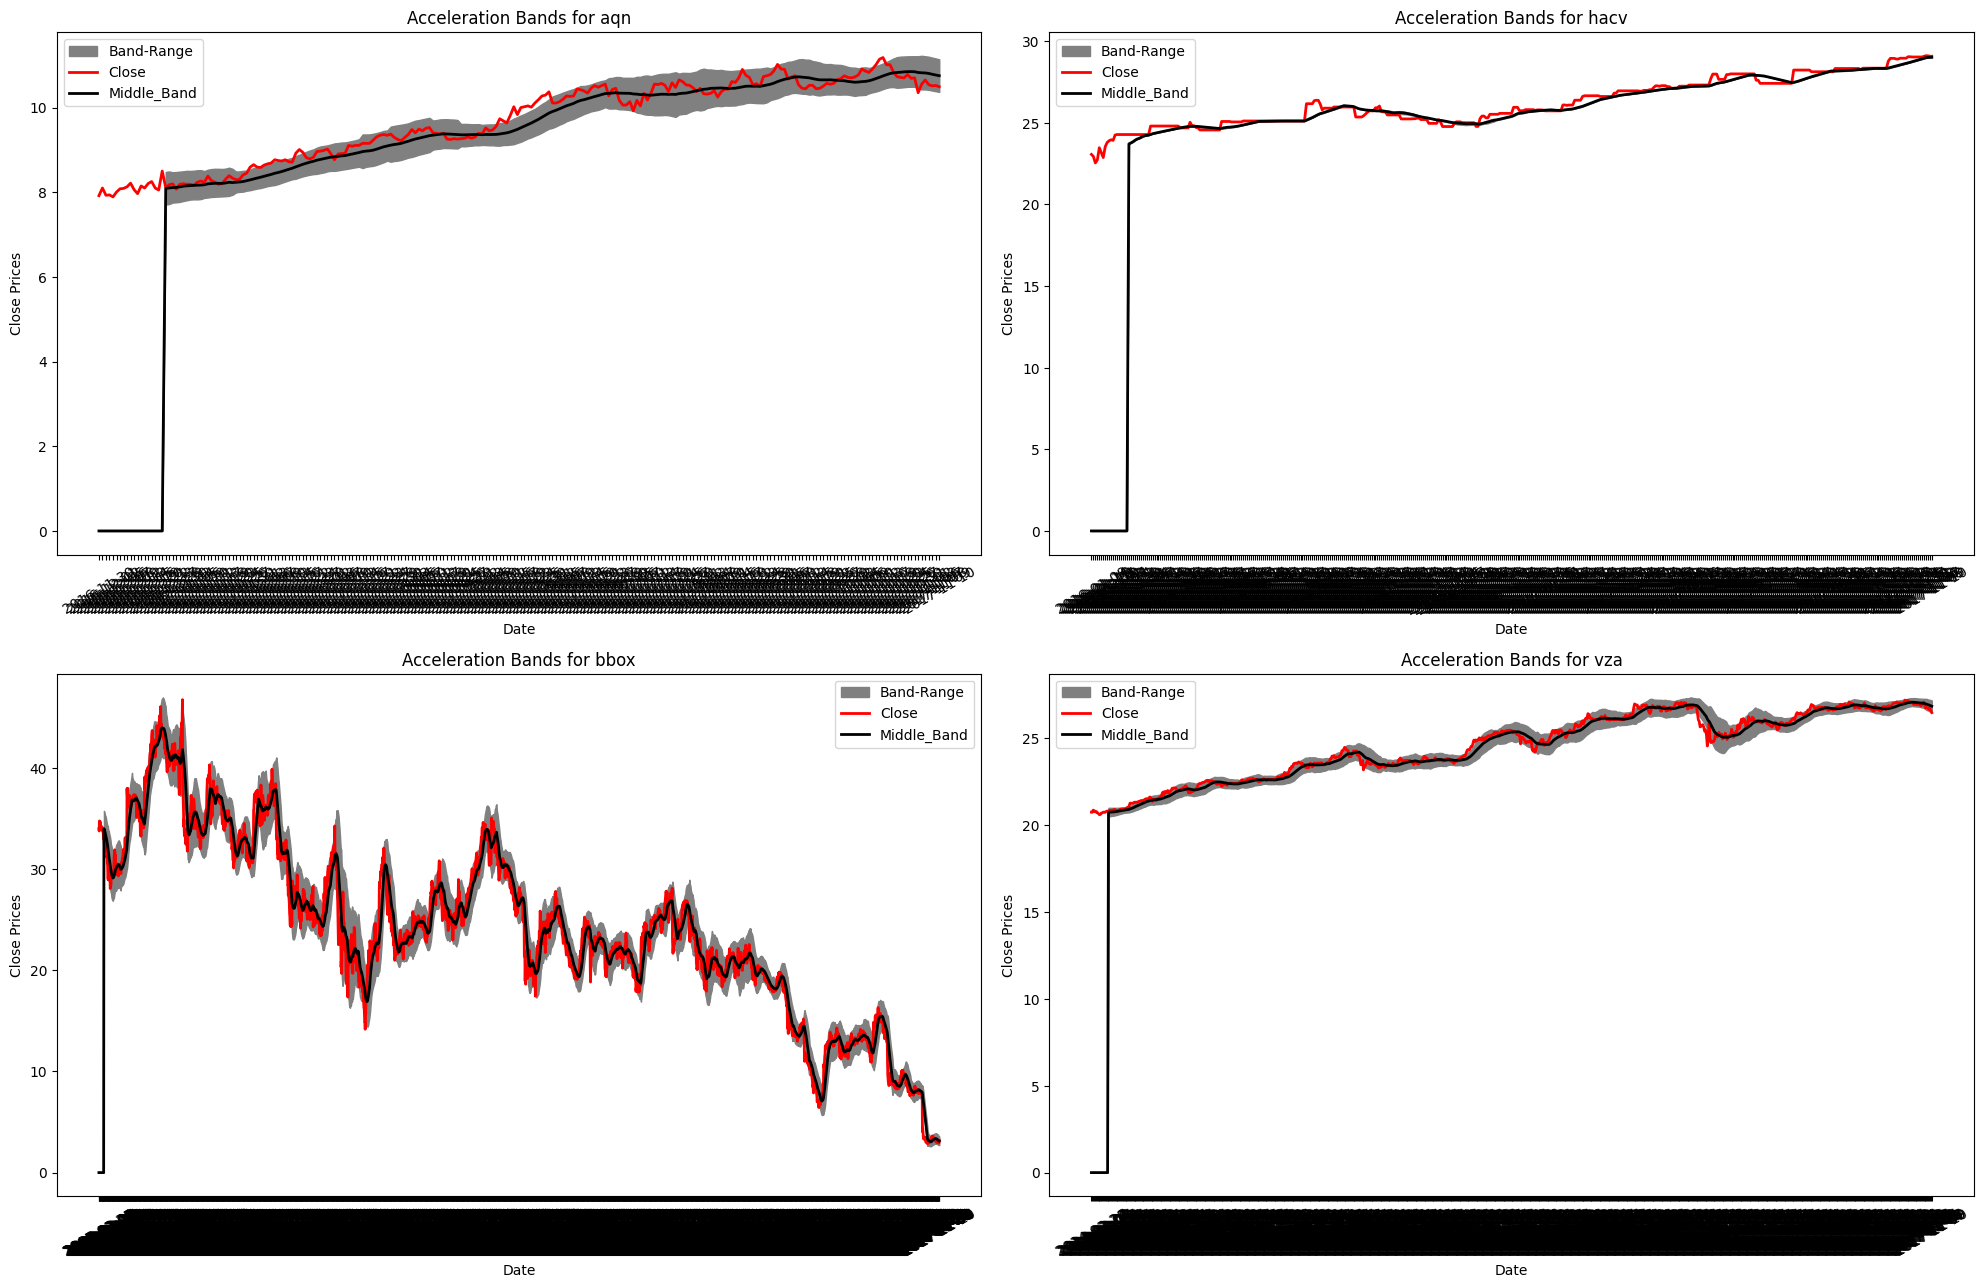

In [32]:
# Acceleration band Plot

fig = plt.figure(figsize=(20,25))
for i in range(4):
    ax = plt.subplot(4,2,i+1)
    ax.fill_between(TechIndicator[i].index, TechIndicator[i]['AB_Upper_Band'], TechIndicator[i]['AB_Lower_Band'], color='grey', label = "Band-Range")
    # Plot Adjust Closing Price and Moving Averages
    ax.plot(TechIndicator[i].index, TechIndicator[i]['Close'], color='red', lw=2, label = "Close")
    ax.plot(TechIndicator[i].index, TechIndicator[i]['AB_Middle_Band'], color='black', lw=2, label="Middle_Band")
    ax.set_title("Acceleration Bands for " + str(TechIndicator[i]['Label'][0]))
    ax.legend()
    ax.set_xlabel("Date")
    ax.set_ylabel("Close Prices")
    plt.xticks(rotation=30)
fig.tight_layout()

# Making Predictions

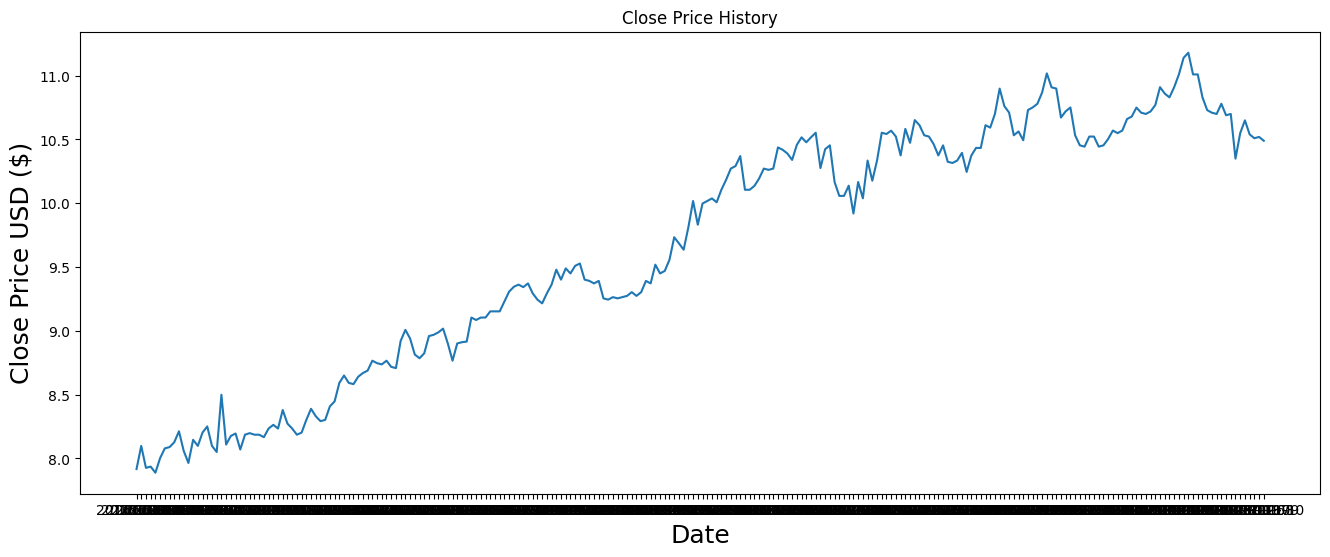

In [33]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(TechIndicator[0]['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [34]:
# Create a new dataframe with only the 'Close column 
data = TechIndicator[0].filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

228

In [35]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00871943],
       [0.06386146],
       [0.01160565],
       [0.01452225],
       [0.        ],
       [0.03478657],
       [0.05802825],
       [0.06094486],
       [0.07255051],
       [0.09864803],
       [0.05222543],
       [0.02324168],
       [0.07835333],
       [0.06386146],
       [0.09573143],
       [0.11025368],
       [0.06386146],
       [0.04930883],
       [0.18569041],
       [0.0670515 ],
       [0.08758925],
       [0.09345283],
       [0.05529394],
       [0.09053623],
       [0.09424275],
       [0.09053623],
       [0.09053623],
       [0.08464226],
       [0.10524077],
       [0.11402096],
       [0.10524077],
       [0.14926325],
       [0.11696795],
       [0.10524077],
       [0.09053623],
       [0.095458  ],
       [0.12574814],
       [0.15217986],
       [0.13455871],
       [0.12280115],
       [0.12574814],
       [0.15807383],
       [0.169801  ],
       [0.21385387],
       [0.23150539],
       [0.21385387],
       [0.21090688],
       [0.228

In [36]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00871943, 0.06386146, 0.01160565, 0.01452225, 0.        ,
       0.03478657, 0.05802825, 0.06094486, 0.07255051, 0.09864803,
       0.05222543, 0.02324168, 0.07835333, 0.06386146, 0.09573143,
       0.11025368, 0.06386146, 0.04930883, 0.18569041, 0.0670515 ,
       0.08758925, 0.09345283, 0.05529394, 0.09053623, 0.09424275,
       0.09053623, 0.09053623, 0.08464226, 0.10524077, 0.11402096,
       0.10524077, 0.14926325, 0.11696795, 0.10524077, 0.09053623,
       0.095458  , 0.12574814, 0.15217986, 0.13455871, 0.12280115,
       0.12574814, 0.15807383, 0.169801  , 0.21385387, 0.23150539,
       0.21385387, 0.21090688, 0.22855841, 0.2373386 , 0.24320219,
       0.2667173 , 0.26085371, 0.25790673, 0.2667173 , 0.25201276,
       0.24909616, 0.31371715, 0.34011849, 0.31958074, 0.28139146])]
[0.27261127145678277]

[array([0.00871943, 0.06386146, 0.01160565, 0.01452225, 0.        ,
       0.03478657, 0.05802825, 0.06094486, 0.07255051, 0.09864803,
       0.05222543, 0.02324168, 0.07

In [37]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

168/168 [==============================] - 11s 35ms/step - loss: 0.0145


In [38]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

1/1 [==============================] - 1s 1s/step


0.43237947393547116

C:\Users\anjal\AppData\Local\Temp\ipykernel_20844\2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


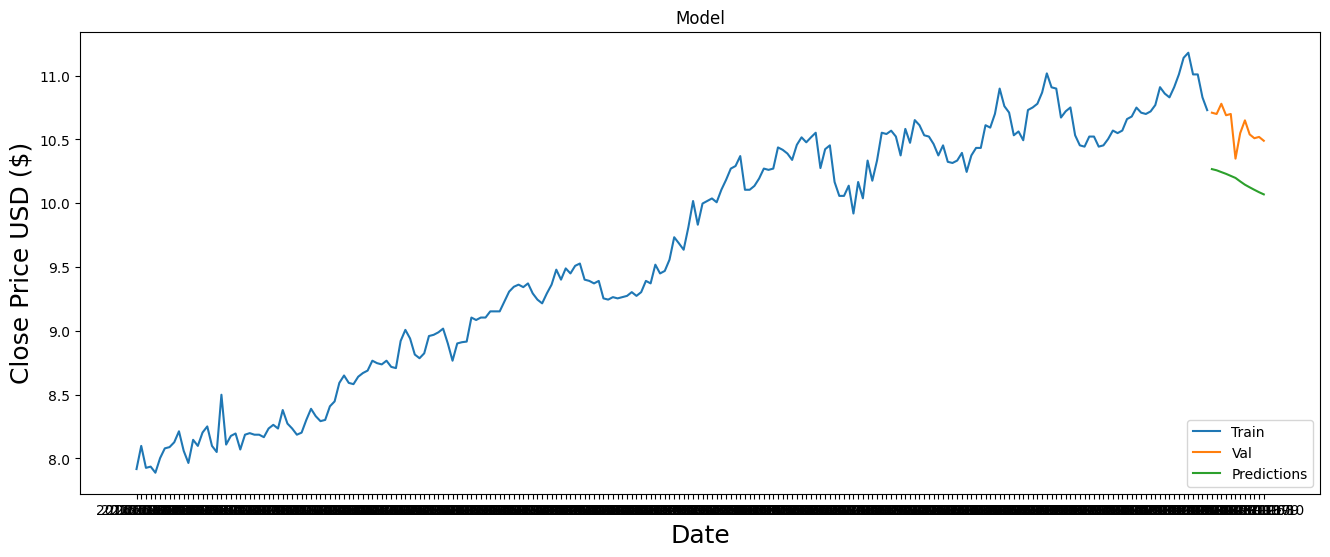

In [39]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [40]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2017-10-26,10.71,10.267918
2017-10-27,10.70,10.258643
2017-10-30,10.78,10.244511
2017-10-31,10.69,10.230723
2017-11-01,10.70,10.214721
2017-11-02,10.35,10.198741
2017-11-03,10.55,10.171503
2017-11-06,10.65,10.145754
2017-11-07,10.54,10.125319
